In [1]:
import os
import subprocess
import h5py
import matplotlib.pyplot as plt
import string
import numpy as np
from glob import glob
from skimage.io import imread
from skimage.transform import downscale_local_mean
import pandas as pd
import seaborn as sns
from pywavesurfer import ws
from scipy.io import savemat,loadmat
import numpy as np
from pywavesurfer import ws
import matlab.engine
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

### Load data

In [2]:
sumPath = '/Volumes/genie/Jihong_GENIE_stuff/GECI_screening/Abhi_Ca_sensor_screen/GENIE rig'
# df_1 = pd.read_pickle(sumPath+'/summary_by_ROI_20230130_FRGECO_raw.pkl')
# print(df_1.shape)
# df_2 = pd.read_pickle(sumPath+'/summary_by_ROI_20230206_FRGECO_raw.pkl')
# print(df_2.shape)
# df_3 = pd.read_pickle(sumPath+'/summary_by_ROI_20230220_FRGECO_raw.pkl')
# df_3.shape
# df = pd.read_pickle(sumPath+'/summary_by_ROI_20230227_FRGECO_raw_low_power_for_1AP.pkl')
df = pd.read_pickle(sumPath+'/20230508_SCaMP_raw/20230508_SCaMP_raw.pkl')

In [3]:
df

,Date,Plate,Well,Construct,Stim,ROI_no,ROI_coordinates,DFF,F0,dFF_peak,T_peak,Half_rise,Half_decay,ImageTime,VPulseTime,nVPulse
0,20230508_SCaMP_raw,P05a-20230424_SCaMP,A03,111dot1670,001FP,1,"[[False, False, False, False, False, False, Fa...","[0.12104373036965425, -0.048079246194733236, 0...",627.950000,0.232182,1.1007,0.3830,0.4510,"[0.0729, 0.0777, 0.0826, 0.0874, 0.0923, 0.097...",[1.012],1
1,20230508_SCaMP_raw,P05a-20230424_SCaMP,A03,111dot1670,003FP,1,"[[False, False, False, False, False, False, Fa...","[-0.09601759100903973, -0.07647202540923517, -...",624.650000,0.265575,2.5555,1.3384,2.1675,"[0.0565, 0.0613, 0.0662, 0.071, 0.0759, 0.0807...","[1.0115, 1.0232, 1.0349]",3
2,20230508_SCaMP_raw,P05a-20230424_SCaMP,A03,111dot1670,010FP,1,"[[False, False, False, False, False, False, Fa...","[0.0594315245478035, 0.08762038994597122, -0.1...",615.850000,0.277895,0.7564,0.3152,0.1988,"[0.0681, 0.073, 0.0778, 0.0827, 0.0875, 0.0924...","[1.0118, 1.0235, 1.0352, 1.0469, 1.0587, 1.070...",10
3,20230508_SCaMP_raw,P05a-20230424_SCaMP,A03,111dot1670,160FP,1,"[[False, False, False, False, False, False, Fa...","[0.05759682224429009, 0.09483614697120171, 0.1...",622.400000,0.310824,1.9590,1.8426,3.1228,"[0.0637, 0.0686, 0.0734, 0.0782, 0.0831, 0.087...","[1.0122, 1.0239, 1.0356, 1.0474, 1.0591, 1.070...",163
4,20230508_SCaMP_raw,P05a-20230424_SCaMP,A04,211dot1488,001FP,1,"[[False, False, False, False, False, False, Fa...","[0.06062192440582223, -0.012668830488953236, 0...",608.020000,0.189404,5.6782,2.2257,0.0533,"[0.0688, 0.0736, 0.0785, 0.0833, 0.0882, 0.093...",[1.0104],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,20230508_SCaMP_raw,P05a-20230424_SCaMP,H09,144dot13,160FP,5,"[[False, False, False, False, False, False, Fa...","[-0.15629969132915522, -0.002899635207183103, ...",631.820000,3.145543,1.8717,0.2861,1.0717,"[0.0484, 0.0532, 0.0581, 0.0629, 0.0678, 0.072...","[1.0121, 1.0239, 1.0356, 1.0473, 1.059, 1.0708...",163
3680,20230508_SCaMP_raw,P05a-20230424_SCaMP,H09,144dot13,001FP,6,"[[False, False, False, False, False, False, Fa...","[-0.14065418973540306, -0.03671750280221467, 0...",585.182353,0.141605,3.9083,2.9870,0.9843,"[0.0704, 0.0752, 0.0801, 0.0849, 0.0898, 0.094...",[1.0098],1
3681,20230508_SCaMP_raw,P05a-20230424_SCaMP,H09,144dot13,003FP,6,"[[False, False, False, False, False, False, Fa...","[-0.14722902687542214, -0.050307096957432657, ...",584.688235,0.252175,0.1454,0.0679,0.5431,"[0.0439, 0.0487, 0.0536, 0.0584, 0.0633, 0.068...","[1.0113, 1.023, 1.0348]",3
3682,20230508_SCaMP_raw,P05a-20230424_SCaMP,H09,144dot13,010FP,6,"[[False, False, False, False, False, False, Fa...","[-0.06734260957106443, -0.03678136123395591, 0...",580.605882,0.575882,0.2521,0.0970,0.3443,"[0.0547, 0.0596, 0.0644, 0.0693, 0.0741, 0.079...","[1.0098, 1.0216, 1.0333, 1.045, 1.0567, 1.0685...",10


### Assign light path and transfection method info

In [4]:
# Methods = []
# Light_path = []
# for i,r in df_1.iterrows():
#     if r['Plate'] in ['P05a-20230117_FRGECO','P06a-20230117_FRGECO','P07a-20230117_FRGECO','P08a-20230117_FRGECO']:
#         meth = 'Electroporation'
#     elif r['Plate'] in ['P09a-20230117_FRGECO','P10a-20230117_FRGECO']:
#         meth = 'AAV'
#     if r['Plate'] in ['P05a-20230117_FRGECO', 'P06a-20230117_FRGECO','P09a-20230117_FRGECO']:
#         lp = 'mCherry cube'
#     else:
#         if r['Construct'] in ['152dot2','152dot3']:
#             lp = '561SP/dm 593/em 640/30'   
#         else:
#             lp = 'mCherry cube'
#     Methods.append(meth)
#     Light_path.append(lp)

In [5]:
# df_1['Transfection method'] = Methods
# df_1['Light path'] = Light_path

In [6]:
# Methods = []
# Light_path = []
# for i,r in df_2.iterrows():
#     if r['Plate'] in ['P09a-20230123_FRGECO', 'P10a-20230123_FRGECO']:
#         meth = 'Electroporation'
#     elif r['Plate'] in ['P11a-20230123_FRGECO', 'P12a-20230123_FRGECO']:
#         meth = 'AAV'
 
#     if r['Plate'] in ['P10a-20230123_FRGECO', 'P12a-20230123_FRGECO']:
#         lp = 'mCherry cube'
#     else:
#         if r['Construct'] in ['152dot2','152dot3']:
#             lp = '561SP/dm 593/em 640/30'   
#         else:
#             lp = 'mCherry cube'
#     Methods.append(meth)
#     Light_path.append(lp)

In [7]:
# df_2['Transfection method'] = Methods
# df_2['Light path'] = Light_path

In [8]:
# Methods = []
# for i,r in df_3.iterrows():
#     if r['Plate'] in ['P07a-20230206_FRGECO', 'P08a-20230206_FRGECO']:
#         meth = 'Electroporation'
#     elif r['Plate'] in ['P09a-20230206_FRGECO', 'P10a-20230206_FRGECO']:
#         meth = 'AAV'
#     Methods.append(meth)

In [9]:
# df_3['Transfection method'] = Methods
# df_3['Light path'] = 'mCherry cube'

In [10]:
# df = pd.concat([df_1,df_2,df_3],axis=0)
# df.index = np.arange(len(df))
# df.shape
# df.columns
# df.nVPulse.unique()

df['Transfection method'] = 'Electroporation'
df['Light path'] = 'mCherry cube'

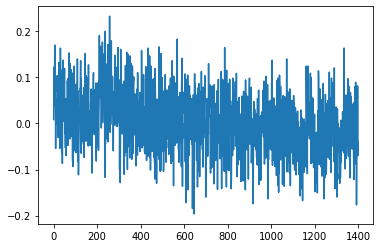

In [11]:
# df[df['Stim']=='001FP']
plt.plot(df.loc[72,'DFF'])
# df.shape

### Smooth raw dFF and run single exponential fit

- Creat x axis data points for single exponential fit (avoid response region)

In [12]:
x_fit = []
for i in np.arange(150):
    x_fit.append(i)
for i in np.arange(1200,1350):
    x_fit.append(i)

- Show raw, smoothed trace and single exponential fit

001FP
144dot9
88


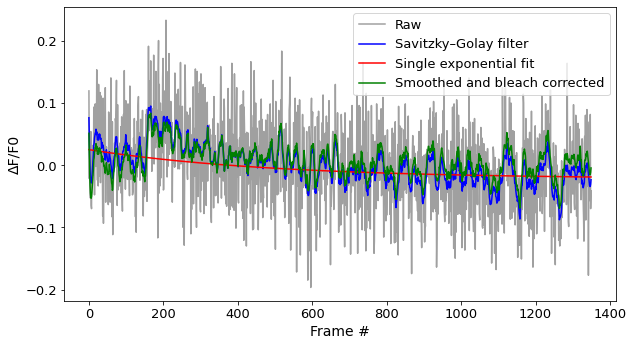

In [13]:
plt.figure(figsize=[9,5])
plt.rc('font',size=13)
from scipy.signal import savgol_filter
# idx = 44 # example trace for 001FP
idx = 72
y = df.loc[idx,'DFF']
print(df.loc[idx,'Stim'])
print(df.loc[idx,'Construct'])
y = y[50:] # remove 1st 50 data points of sharp declining in fluorescence due to unstable power
x = np.arange(len(y))
yhat = savgol_filter(y,21,3)
plt.plot(x,y,color='gray',alpha=0.75,label='Raw')
plt.plot(x,yhat,color='b',label='Savitzky–Golay filter')

tau_idx = np.argmin(np.abs(yhat[:190]-(yhat[0]*0.37+yhat[-1]*0.63)))
print(tau_idx)

p,_ = curve_fit(lambda t,a,b,c:a*np.exp(b*t)+c,x_fit,yhat[x_fit],p0=(yhat[0]-yhat[-1],-1/tau_idx,yhat[-1]))
y2 = p[0]*np.exp(p[1]*x)+p[2]
plt.plot(x,y2,color='r',label='Single exponential fit')
plt.plot(x,yhat-y2,color='g',label='Smoothed and bleach corrected')
plt.ylabel('\u0394F/F0',size=14)
plt.xlabel('Frame #',size=14)
plt.legend()
# plt.xlim([120,200])
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/230314/rGECI screening/smoothing&fit.svg', format='svg')
plt.show()

- Add bleach-corrected trace to dataframe

In [14]:
DFF_bc = []
DFF_sm_bc = []
df = df.dropna()
for i,r in df.iterrows():
    y = r['DFF']
    y = y[50:]
    yhat = savgol_filter(y,21,3)
    x = np.arange(len(y))
    if r['Stim']!='160FP':
        try:
            tau_idx = np.argmin(np.abs(yhat[:190]-(yhat[0]*0.37+yhat[-1]*0.63)))
            p,_ = curve_fit(lambda t,a,b,c:a*np.exp(b*t)+c,x_fit,yhat[x_fit],p0=(yhat[0]-yhat[-1],-1/tau_idx,yhat[-1]))
            y2 = p[0]*np.exp(p[1]*x)+p[2]
            DFF_bc.append(y-y2)
            DFF_sm_bc.append(yhat-y2)
        except:
            DFF_bc.append('invalid fit')
            DFF_sm_bc.append('invalid fit')
    else:
        DFF_bc.append(y)
        DFF_sm_bc.append(y)

/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_72424/3594455482.py:12: RuntimeWarning: overflow encountered in exp
  p,_ = curve_fit(lambda t,a,b,c:a*np.exp(b*t)+c,x_fit,yhat[x_fit],p0=(yhat[0]-yhat[-1],-1/tau_idx,yhat[-1]))
/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_72424/3594455482.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  p,_ = curve_fit(lambda t,a,b,c:a*np.exp(b*t)+c,x_fit,yhat[x_fit],p0=(yhat[0]-yhat[-1],-1/tau_idx,yhat[-1]))
/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_72424/3594455482.py:12: RuntimeWarning: invalid value encountered in multiply
  p,_ = curve_fit(lambda t,a,b,c:a*np.exp(b*t)+c,x_fit,yhat[x_fit],p0=(yhat[0]-yhat[-1],-1/tau_idx,yhat[-1]))
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/87/trl8ql4s7vj6fkdtrrk

In [15]:
df = df.assign(DFF_bc=DFF_bc)
df = df.assign(DFF_smoothed_bc=DFF_sm_bc)

In [16]:
print(df.shape)
print(df.dropna().shape)
df[df['DFF_bc']!='invalid fit'].shape

(3631, 20)
(3631, 20)


/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


(3120, 20)

- Add mutation details to dataframe

In [17]:
df['Construct'].unique()
# plt.plot(df.loc[0,'DFF'])

array(['111dot1670', '211dot1488', '144dot9', '144dot10', '144dot12',
       '144dot13', '144dot11'], dtype=object)

In [18]:
c_d = {
    '111.1670':'jRGECO1a',
    '211.1488':'jRCaMP1a',
    '152.2':'FRGECO1a',
    '152.3':'FRGECO1c',
    '144.2':'SCaMP_40A1',
    '144.3':'SCaMP_41C1',
    '144.4':'SCaMP_72C8',
    '144.5':'SCaMP_72D5',
    '144.6':'SCaMP_72E5',
    '144.7':'SCaMP_76B4',
    '144.8':'SCaMP_76H9',
    '144.9':'SCaMP_77D4',
    '144.10':'SCaMP_79E12',
    '144.11':'SCaMP_80F8',
    '144.12':'SCaMP_82D1',
    '144.13':'SCaMP_82D7'
}
df = df[df['Construct']!='TEOnly']
Construct_ID = []
Mutation = []
for i,r in df.iterrows():
    Construct_ID.append(r['Construct'].replace('dot','.'))
    Mutation.append(c_d[r['Construct'].replace('dot','.')])
df = df.assign(Construct_ID=Construct_ID)
df = df.assign(Mutation=Mutation)

### Compare different construct (mCherry cube and electroporation method only)

In [19]:
# C = ['111.1670','211.1488','152.2','152.3','144.2','144.3','144.4','144.5','144.6','144.7','144.8','144.9']
C = ['111.1670','211.1488','144.9','144.10','144.11','144.12','144.13']
df_plot = pd.DataFrame()
for c in C:
#     print(c)
    df_t = df[df['Construct_ID']==c]
    df_plot = pd.concat([df_plot,df_t],axis=0)

In [20]:
df.Mutation.unique()

array(['jRGECO1a', 'jRCaMP1a', 'SCaMP_77D4', 'SCaMP_79E12', 'SCaMP_82D1',
       'SCaMP_82D7', 'SCaMP_80F8'], dtype=object)

In [21]:
## df_plot.Stim.unique()
df_plot.columns

Index(['Date', 'Plate', 'Well', 'Construct', 'Stim', 'ROI_no',
       'ROI_coordinates', 'DFF', 'F0', 'dFF_peak', 'T_peak', 'Half_rise',
       'Half_decay', 'ImageTime', 'VPulseTime', 'nVPulse',
       'Transfection method', 'Light path', 'DFF_bc', 'DFF_smoothed_bc',
       'Construct_ID', 'Mutation'],
      dtype='object')

- Check variability for stim start

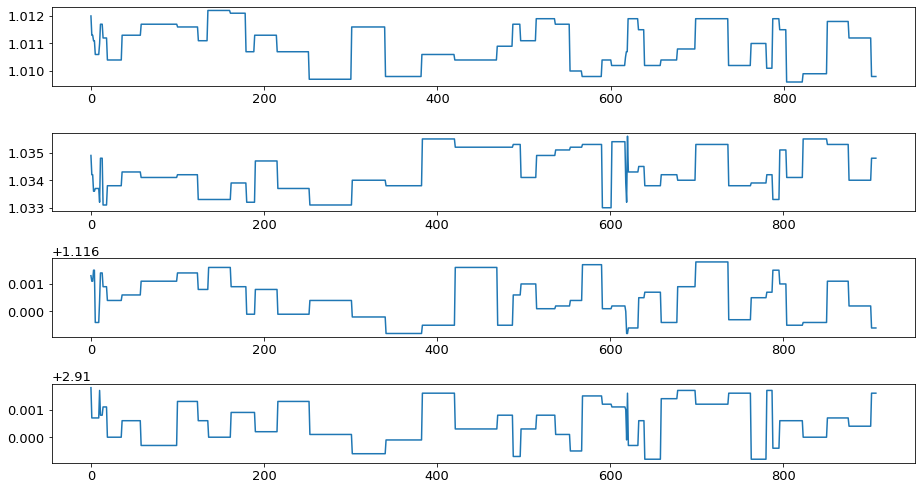

In [22]:
plt.figure(figsize=[13,7])
sp=1
for s in df_plot.Stim.unique():
    ax = plt.subplot(4,1,sp)
    df_s = df_plot[df_plot['Stim']==s]
    S = []
    for i,r in df_s.iterrows():
        S.append(r['VPulseTime'][-1])
    ax.plot(S)
    sp+=1
plt.tight_layout()
plt.show()

In [23]:
# df_plot.loc[0,'DFF'].shape

In [24]:
def get_kinetics(trace,stim_start=200,fr=206.6,stim='001FP',stim_end=552):
    start_frame = int(stim_start*fr)-50 # first 50 frames were truncated for single exponential fit
    trace_sel_for_rise = trace[start_frame:start_frame+400] # trace segment for rise trace selection
    peak = np.argmin(np.abs(trace_sel_for_rise-np.max(trace_sel_for_rise)))
    rise_trace = trace_sel_for_rise[:peak]
    half_rise_amp = trace_sel_for_rise[0]+0.5*(trace_sel_for_rise[-1]-trace_sel_for_rise[0])
    half_rise_idx = np.argmin(np.abs(rise_trace-half_rise_amp))
    half_rise_time = half_rise_idx/fr
    
    trace_sel_for_decay = trace[start_frame:] # trace segment for rise trace selection
    if stim!='160FP':
        peak = np.argmin(np.abs(trace_sel_for_decay-np.max(trace_sel_for_decay)))
        decay_trace = trace_sel_for_decay[peak:]
    else:
        decay_trace = trace_sel_for_decay[int(stim_end*fr)-50:]   
    half_decay_amp = trace_sel_for_decay[0]-0.5*(trace_sel_for_decay[0]-trace_sel_for_decay[-1])
    half_decay_idx = np.argmin(np.abs(decay_trace-half_decay_amp))
    half_decay_time = half_decay_idx/fr
    
    return half_rise_time,half_decay_time

In [25]:
# df_plot = df_plot[df_plot['DFF_bc']!='invalid fit']
df_plot

,Date,Plate,Well,Construct,Stim,ROI_no,ROI_coordinates,DFF,F0,dFF_peak,...,Half_decay,ImageTime,VPulseTime,nVPulse,Transfection method,Light path,DFF_bc,DFF_smoothed_bc,Construct_ID,Mutation
0,20230508_SCaMP_raw,P05a-20230424_SCaMP,A03,111dot1670,001FP,1,"[[False, False, False, False, False, False, Fa...","[0.12104373036965425, -0.048079246194733236, 0...",627.950000,0.232182,...,0.4510,"[0.0729, 0.0777, 0.0826, 0.0874, 0.0923, 0.097...",[1.012],1,Electroporation,mCherry cube,"[0.04217722074048015, 0.06654829998869277, 0.0...","[0.05988577107085668, 0.0356563337416208, 0.01...",111.1670,jRGECO1a
1,20230508_SCaMP_raw,P05a-20230424_SCaMP,A03,111dot1670,003FP,1,"[[False, False, False, False, False, False, Fa...","[-0.09601759100903973, -0.07647202540923517, -...",624.650000,0.265575,...,2.1675,"[0.0565, 0.0613, 0.0662, 0.071, 0.0759, 0.0807...","[1.0115, 1.0232, 1.0349]",3,Electroporation,mCherry cube,"[-0.14698918794684368, -0.005157340164138651, ...","[-0.09790178569019169, -0.05583951047791762, -...",111.1670,jRGECO1a
2,20230508_SCaMP_raw,P05a-20230424_SCaMP,A03,111dot1670,010FP,1,"[[False, False, False, False, False, False, Fa...","[0.0594315245478035, 0.08762038994597122, -0.1...",615.850000,0.277895,...,0.1988,"[0.0681, 0.073, 0.0778, 0.0827, 0.0875, 0.0924...","[1.0118, 1.0235, 1.0352, 1.0469, 1.0587, 1.070...",10,Electroporation,mCherry cube,"[-0.1078157087385776, 0.020155175294791383, 0....","[-0.005262329689197515, 0.014641288909501171, ...",111.1670,jRGECO1a
3,20230508_SCaMP_raw,P05a-20230424_SCaMP,A03,111dot1670,160FP,1,"[[False, False, False, False, False, False, Fa...","[0.05759682224429009, 0.09483614697120171, 0.1...",622.400000,0.310824,...,3.1228,"[0.0637, 0.0686, 0.0734, 0.0782, 0.0831, 0.087...","[1.0122, 1.0239, 1.0356, 1.0474, 1.0591, 1.070...",163,Electroporation,mCherry cube,"[0.10476663356504481, 0.020357497517378465, 0....","[0.10476663356504481, 0.020357497517378465, 0....",111.1670,jRGECO1a
292,20230508_SCaMP_raw,P05a-20230424_SCaMP,B03,111dot1670,001FP,1,"[[False, False, False, False, False, False, Fa...","[-0.03758936121146888, 0.07079714044123292, 0....",593.842857,0.155354,...,1.3044,"[0.0556, 0.0604, 0.0653, 0.0701, 0.075, 0.0798...",[1.0113],1,Electroporation,mCherry cube,invalid fit,invalid fit,111.1670,jRGECO1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,20230508_SCaMP_raw,P05a-20230424_SCaMP,H09,144dot13,160FP,5,"[[False, False, False, False, False, False, Fa...","[-0.15629969132915522, -0.002899635207183103, ...",631.820000,3.145543,...,1.0717,"[0.0484, 0.0532, 0.0581, 0.0629, 0.0678, 0.072...","[1.0121, 1.0239, 1.0356, 1.0473, 1.059, 1.0708...",163,Electroporation,mCherry cube,"[-0.09456552240202001, -0.00196426901131774, 0...","[-0.09456552240202001, -0.00196426901131774, 0...",144.13,SCaMP_82D7
3680,20230508_SCaMP_raw,P05a-20230424_SCaMP,H09,144dot13,001FP,6,"[[False, False, False, False, False, False, Fa...","[-0.14065418973540306, -0.03671750280221467, 0...",585.182353,0.141605,...,0.9843,"[0.0704, 0.0752, 0.0801, 0.0849, 0.0898, 0.094...",[1.0098],1,Electroporation,mCherry cube,"[0.02034718809816944, -0.03637782172167615, 0....","[0.002376376137018495, 1.7772185403592752e-05,...",144.13,SCaMP_82D7
3681,20230508_SCaMP_raw,P05a-20230424_SCaMP,H09,144dot13,003FP,6,"[[False, False, False, False, False, False, Fa...","[-0.14722902687542214, -0.050307096957432657, ...",584.688235,0.252175,...,0.5431,"[0.0439, 0.0487, 0.0536, 0.0584, 0.0633, 0.068...","[1.0113, 1.023, 1.0348]",3,Electroporation,mCherry cube,"[0.03644132318458777, 0.019016469217690415, 0....","[0.020262776996363228, 0.012325580504823998, 0...",144.13,SCaMP_82D7
3682,20230508_SCaMP_raw,P05a-20230424_SCaMP,H09,144dot13,010FP,6,"[[False, False, False, False, False, False, Fa...","[-0.06734260957106443, -0.03678136123395591, 0...",580.605882,0.575882,...,0.3443,"[0.0547, 0.0596, 0.0644, 0.0693, 0.0741, 0.079...","[1.0098, 1.0216, 1.0333, 1.045, 1.0567, 1.0685...",10,Electroporation,m

In [26]:
HR = []
HD = []
for i,r in df_plot.iterrows():
    try:
        hr,hd = get_kinetics(r['DFF_smoothed_bc'],stim_start=r['VPulseTime'][0],stim=r['Stim'],stim_end=r['VPulseTime'][-1])
#         hr,hd = get_kinetics(r['DFF'],stim_start=r['VPulseTime'][0],stim=r['Stim'],stim_end=r['VPulseTime'][-1])

        HR.append(hr)
        HD.append(hd)
    except:
        HR.append(np.nan)
        HD.append(np.nan)

In [27]:
# df_plot = df_plot.drop(columns=['Half_rise_sm_bc', 'Half_decay_sm_bc'])
df_plot = df_plot.assign(Half_rise_sm_bc = HR)
df_plot = df_plot.assign(Half_decay_sm_bc = HD)
df_plot.columns
# print(df_plot.shape)
# df_plot.dropna().shape
# df_plot.head()

Index(['Date', 'Plate', 'Well', 'Construct', 'Stim', 'ROI_no',
       'ROI_coordinates', 'DFF', 'F0', 'dFF_peak', 'T_peak', 'Half_rise',
       'Half_decay', 'ImageTime', 'VPulseTime', 'nVPulse',
       'Transfection method', 'Light path', 'DFF_bc', 'DFF_smoothed_bc',
       'Construct_ID', 'Mutation', 'Half_rise_sm_bc', 'Half_decay_sm_bc'],
      dtype='object')

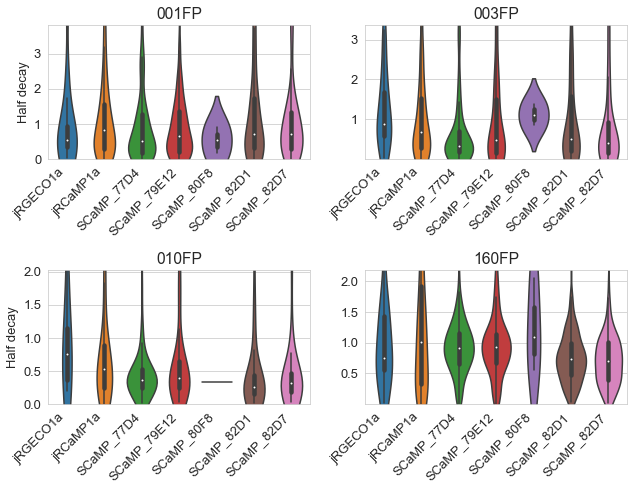

In [56]:
sns.set_style('whitegrid')
Stim = ['001FP','003FP','010FP','160FP']
plt.figure(figsize=[9,7])
plt.rc('font',size=13)

# param = 'DFF'
# param = 'F0'
# param = 'dFF_peak'
# param = 'dFF_peak_smoothed_bc'
# param = 'T_peak'
# param = 'Half_rise'
param = 'Half_decay'
# param = 'Half_decay_bc'

i=1
for stim in Stim:
    ax=plt.subplot(2,2,i)
    df_plot_s = df_plot[(df_plot['Stim']==stim)&(df_plot['Transfection method']=='Electroporation')&
                      (df_plot['Construct']!='TEOnly')&(df_plot['Light path']=='mCherry cube')] # Electroporation
    df_plot_s = df_plot_s.dropna()
    sns.violinplot(x='Mutation',y=param,data=df_plot_s,ax=ax,size=7.5,alpha=0.75)
    y_min = np.quantile(df_plot_s[param],0)
#     y_max = np.quantile(df_plot_s[param],0.99) # DFF
#     y_max = np.quantile(df_plot_s[param],0.9) # F0
    y_max = np.quantile(df_plot_s[param],0.95) # Half_rise, Half_decay
    ax.set_ylim([y_min,y_max])
#     ax.set_ylim([-0.05,y_max])
    if i in [1,3]:
#         ax.set_ylabel('\u0394F/F0')
#         ax.set_ylabel('F0')
#         ax.set_ylabel('Half rise')
        ax.set_ylabel('Half decay')
    else:
        ax.set_ylabel(param,color='w')
    ax.set_xlabel('')
    ax.set_title(stim)

    plt.xticks(rotation=45,ha='right')
    i+=1
#     break
plt.tight_layout()
# plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/230523/SCaMP/%s.svg' %param,format='svg')   
plt.show()

In [29]:
# sns.set_style('whitegrid')
# Stim = ['001FP','003FP','010FP','160FP']
# plt.figure(figsize=[12,7])
# plt.rc('font',size=13)

# # param = 'DFF'
# # param = 'F0'
# # param = 'dFF_peak'
# # param = 'T_peak'
# # param = 'Half_rise'
# # param = 'Half_decay'
# # param = 'Half_rise_sm_bc'
# param = 'Half_decay_sm_bc'

# i=1
# for stim in Stim:
#     ax=plt.subplot(2,2,i)
#     df_plot_s = df_plot[(df_plot['Stim']==stim)&(df_plot['Transfection method']=='Electroporation')&
#                       (df_plot['Construct']!='TEOnly')&(df_plot['Light path']=='mCherry cube')] # Electroporation
#     df_plot_s = df_plot_s.dropna()
#     sns.violinplot(x='Mutation',y=param,data=df_plot_s,ax=ax,size=7.5,alpha=0.75)
#     y_min = np.quantile(df_plot_s[param],0)
# #     y_min = ax.get_ylim()[0]
# #     y_max = np.quantile(df_plot_s[param],0.99) # DFF
# #     y_max = np.quantile(df_plot_s[param],0.9) # F0
# #     y_max = np.quantile(df_plot_s[param],0.95) # Half_rise, Half_decay
# #     ax.set_ylim([y_min,y_max])
# #     ax.set_ylim([-0.05,y_max])
#     if i in [1,3]:
#         ax.set_ylabel(param)
#     else:
#         ax.set_ylabel(param,color='w')
#     ax.set_xlabel('')
#     ax.set_title(stim)

#     plt.xticks(rotation=45,ha='right')
#     i+=1
# #     break
# plt.tight_layout()
# # plt.savefig('/Users/zhengj10/Desktop/230307/%s_electroporation.svg' %param,format='svg')
# plt.show()

/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


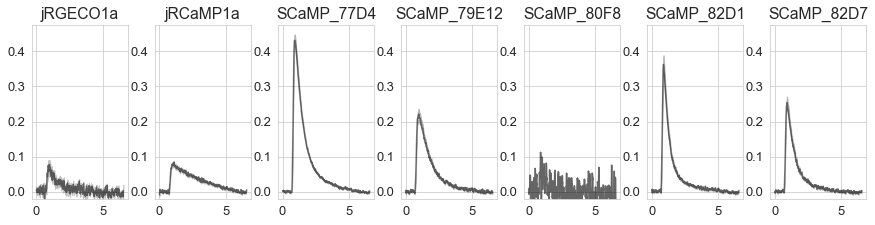

In [74]:
stim = '010FP'

df_plot_s = df_plot[(df_plot['Stim']==stim)&(df_plot['Transfection method']=='Electroporation')&
                      (df_plot['Construct']!='TEOnly')&(df_plot['Light path']=='mCherry cube')&
                   (df_plot['DFF_bc']!='invalid fit')] # Electroporation

# df_plot_s = df_plot[(df_plot['Stim']==stim)&(df_plot['Transfection method']=='Electroporation')&
#                       (df_plot['Construct']!='TEOnly')&(df_plot['Light path']=='mCherry cube')] # Electroporation

# df_plot_s = df_plot[(df_plot['Stim']==stim)]
                    
df_plot_s = df_plot_s.dropna()
# df_plot_s = df.dropna()
plt.figure(figsize=[12,3])
plt.rc('font',size=13)
i = 1
for c in df_plot_s['Mutation'].unique():
    df_p = df_plot_s[df_plot_s['Mutation']==c]
# for c in df_plot_s['Construct'].unique():
#     df_p = df_plot_s[df_plot_s['Construct']==c]
    ax = plt.subplot(1,7,i)
    x = np.arange(1350)/206.6   
#     x = np.arange(1400)/206.6
    start_idx = 0
    
#     mean = np.mean(df_p.DFF.to_list(),axis=0)
#     err = np.std(df_p.DFF.to_list(),axis=0)/np.sqrt(len(df_p))

    mean = np.mean(df_p.DFF_smoothed_bc.to_list(),axis=0)
    err = np.std(df_p.DFF_smoothed_bc.to_list(),axis=0)/np.sqrt(len(df_p))
    
    ax.plot(x[start_idx:],mean[start_idx:],color='k',alpha=0.5)
    ax.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],color='k',
                    alpha=0.2)
#     ylim = {
#         '001FP':[-0.05,0.2],
#         '003FP':[-0.05,0.55],
#         '010FP':[-0.2,1.8],
#         '160FP':[-0.2,4]
#     }
#     ax.set_ylim(ylim[stim])
    ax.set_ylim([-0.02,0.475])
    ax.set_title(c)
    i+=1
plt.tight_layout(pad=0.2)
plt.savefig('/Volumes/genie/Presentations/Jihong/GENIE production/230523/SCaMP/dFF_traces_%s.svg' %stim,format='svg')
plt.show()

In [41]:
dFF_peak_smoothed_bc = []
for i,r in df_plot.iterrows():
    try:
        dFF_peak_smoothed_bc.append(np.max(r['DFF_smoothed_bc'])-np.max(r['DFF_smoothed_bc'][:100]))
    except:
        dFF_peak_smoothed_bc.append(np.nan)
# plt.plot(mean[:150])

In [42]:
df_plot['dFF_peak_smoothed_bc'] = dFF_peak_smoothed_bc

### Paper figures

- Bleach corrected dFF traces - selected sensors

In [ ]:
df_plot_s.to_excel('/Users/zhengj10/Desktop/rGECI paper figure/data.xlsx')

In [ ]:
# All stim

sns.reset_orig()
df_plot_s = df_plot[(df_plot['Transfection method']=='Electroporation')&
                      (df_plot['Construct']!='TEOnly')&(df_plot['Light path']=='mCherry cube')&
                   (df_plot['DFF_bc']!='invalid fit')] # Electroporation
df_plot_s = df_plot_s.dropna()

c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}
t_map = {'001FP':'1 Action potential','003FP':'3 Action potentials','010FP':'10 Action potentials',
         '160FP':'160 Action potentials'}

f,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2,ncols=4,gridspec_kw={'height_ratios': [3,0.3]},
                                                figsize=(13,3))

sensors = ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c']

# sensors = ['jRGECO1a','jRCaMP1a','SCaMP_41C1','SCaMP_77D4']
# c_map = {'jRGECO1a':'k','jRCaMP1a':'b','SCaMP_41C1':'r','SCaMP_77D4':'g'}

Mean = []
Sem = []
C = []
Stim = []
for c in sensors:
    s = '001FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.nanmean(df_p.DFF_bc.to_list(),axis=0)
    err = np.nanstd(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0

    ax1.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
    ax1.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                    color = c_map[c],alpha=0.2)
    
    C.append(c)
    Stim.append(s)
    Mean.append(mean)
    Sem.append(err)
    
ax1.set_title(t_map[s],size=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.yaxis.set_tick_params(labelsize=13)
ax1.set_ylabel('\u0394F/F0',size=13)
# ax1.get_yaxis().set_label_coords(-0.3,0.5)

width = 0.05
ax5.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax5.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.set_yticks([])
ax5.set_xlabel('Time (s)',size=13)
ax5.xaxis.set_tick_params(labelsize=13)


for c in sensors:
    s = '003FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.nanmean(df_p.DFF_bc.to_list(),axis=0)
    err = np.nanstd(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0

    ax2.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
    ax2.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                    color = c_map[c],alpha=0.2)
    
    C.append(c)
    Stim.append(s)
    Mean.append(mean)
    Sem.append(err)
    
ax2.set_title(t_map[s],size=14)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.yaxis.set_tick_params(labelsize=13)
ax2.set_ylabel('\u0394F/F0',size=13)
# ax1.get_yaxis().set_label_coords(-0.3,0.5)

width = 0.05
ax6.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax6.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.set_yticks([])
ax6.set_xlabel('Time (s)',size=13)
ax6.xaxis.set_tick_params(labelsize=13)

for c in sensors:
    s = '010FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.nanmean(df_p.DFF_bc.to_list(),axis=0)
    err = np.nanstd(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0
    ax3.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
    ax3.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                    color = c_map[c],alpha=0.2)
    
    C.append(c)
    Stim.append(s)
    Mean.append(mean)
    Sem.append(err)
    
ax3.set_title(t_map[s],size=14)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.set_xticks([])
ax3.yaxis.set_tick_params(labelsize=13)
ax3.set_ylabel('\u0394F/F0',size=13)

width = 0.05
ax7.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax7.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax7.set_yticks([])
ax7.set_xlabel('Time (s)',size=13)
ax7.xaxis.set_tick_params(labelsize=13)

for c in sensors:
    s = '160FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.nanmean(df_p.DFF_bc.to_list(),axis=0)
    err = np.nanstd(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0
    ax4.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
    ax4.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                    color = c_map[c],alpha=0.2)
    
    C.append(c)
    Stim.append(s)
    Mean.append(mean)
    Sem.append(err)
    
ax4.set_title(t_map[s],size=14)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_xticks([])
ax4.yaxis.set_tick_params(labelsize=13)
ax4.set_ylabel('\u0394F/F0',size=13)

width = 0.05
ax8.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax8.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.set_yticks([])
ax8.set_xlabel('Time (s)',size=13)
ax8.xaxis.set_tick_params(labelsize=13)

ax4.legend(frameon=False,bbox_to_anchor=(0.95,1),fontsize=13)

plt.tight_layout(pad=0.1)
# f.savefig('/Users/zhengj10/Desktop/rGECI paper figure/dFF_traces_with_1AP.svg',format='svg')
# f.savefig('/Users/zhengj10/Desktop/rGECI paper figure/dFF_traces_with_1AP.eps',format='eps')
plt.show()

In [ ]:
df_dFF_traces = pd.DataFrame()

In [ ]:
df_dFF_traces['Construct'] = C
df_dFF_traces['Stim'] = Stim
df_dFF_traces['Mean'] = Mean
df_dFF_traces['SEM'] = Sem

In [ ]:
df_dFF_traces.columns

In [ ]:
df_dFF = pd.DataFrame()
df_dFF['Time (s)'] = np.arange(1,df_dFF_traces.loc[0,'Mean'].shape[0]+1)/206.6
for c in df_dFF_traces['Construct'].unique():
    for stim in df_dFF_traces['Stim'].unique():
        df_temp = df_dFF_traces[(df_dFF_traces['Stim']==stim)&(df_dFF_traces['Construct']==c)]
        for i,r in df_temp.iterrows():
            s1 = pd.Series(r['Mean'])
            df_dFF = pd.concat((df_dFF,s1.rename(r['Construct']+' '+r['Stim']+' '+'Mean')),axis=1)
            s2 = pd.Series(r['SEM'])
            df_dFF = pd.concat((df_dFF,s2.rename(r['Construct']+' '+r['Stim']+' '+'SEM')),axis=1)

In [ ]:
# df_dFF

In [ ]:
from itertools import zip_longest
df_dFF.columns = pd.MultiIndex.from_arrays(zip_longest(*df_dFF.columns.map(str.split), fillvalue=''))
df_dFF

In [ ]:
df_dFF.to_excel('/Users/zhengj10/Desktop/rGECI paper figure/dFF_traces.xlsx')

In [ ]:
# 003, 010 and 160FP only

sns.reset_orig()
df_plot_s = df_plot[(df_plot['Transfection method']=='Electroporation')&
                      (df_plot['Construct']!='TEOnly')&(df_plot['Light path']=='mCherry cube')&
                   (df_plot['DFF_bc']!='invalid fit')] # Electroporation
df_plot_s = df_plot_s.dropna()

c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}
t_map = {'001FP':'1 Action potential','003FP':'3 Action potentials','010FP':'10 Action potentials',
         '160FP':'160 Action potentials'}

f,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,gridspec_kw={'height_ratios': [3,0.3]},
                                                figsize=(10,3))

sensors = ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c']

# sensors = ['jRGECO1a','jRCaMP1a','SCaMP_41C1','SCaMP_77D4']
# c_map = {'jRGECO1a':'k','jRCaMP1a':'b','SCaMP_41C1':'r','SCaMP_77D4':'g'}

for c in sensors:
    s = '003FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
    err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0

    ax1.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
    ax1.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                    color = c_map[c],alpha=0.2)
ax1.set_title(t_map[s],size=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.yaxis.set_tick_params(labelsize=13)
ax1.set_ylabel('\u0394F/F0',size=13)
# ax1.get_yaxis().set_label_coords(-0.3,0.5)

width = 0.05
ax4.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax4.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.set_yticks([])
ax4.set_xlabel('Time (s)',size=13)
ax4.xaxis.set_tick_params(labelsize=13)

for c in sensors:
    s = '010FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
    err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0
    ax2.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
    ax2.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                    color = c_map[c],alpha=0.2)
ax2.set_title(t_map[s],size=14)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.yaxis.set_tick_params(labelsize=13)
ax2.set_ylabel('\u0394F/F0',size=13)

width = 0.05
ax5.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax5.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.set_yticks([])
ax5.set_xlabel('Time (s)',size=13)
ax5.xaxis.set_tick_params(labelsize=13)

for c in sensors:
    s = '160FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
    err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0
    ax3.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
    ax3.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                    color = c_map[c],alpha=0.2)
ax3.set_title(t_map[s],size=14)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.set_xticks([])
ax3.yaxis.set_tick_params(labelsize=13)
ax3.set_ylabel('\u0394F/F0',size=13)

width = 0.05
ax6.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax6.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.set_yticks([])
ax6.set_xlabel('Time (s)',size=13)
ax6.xaxis.set_tick_params(labelsize=13)

ax3.legend(frameon=False,bbox_to_anchor=(0.95,1),fontsize=13)

plt.tight_layout(pad=0.1)
# f.savefig('/Users/zhengj10/Desktop/rGECI paper figure/dFF_traces.svg',format='svg')
plt.show()

In [ ]:
df_plot_s.index = np.arange(len(df_plot_s))
SNR = []
for i,r in df_plot_s.iterrows():
    SNR.append(r['dFF_peak']/np.std(r['DFF_bc'][50:100]))
df_plot_s['SNR'] = SNR

import matplotlib
plt.figure(figsize=[13,3])
plt.rc('font',size=13)

x = [1,3,10,160]
i = 1
param = ['dFF_peak','Half_rise','Half_decay','SNR']
t_map = {'dFF_peak':'Peak \u0394F/F0','Half_rise':'Half rise time (s)','Half_decay':'Half decay time (s)',
         'SNR':'SNR'}

sensors = ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c']
c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}
n = len(sensors)-4
colors = plt.cm.tab10(np.linspace(0,1,n))

Param = []
C = []
Stim = []
MEAN = []
SEM = []
df_param = pd.DataFrame()

for p in param:
    ax = plt.subplot(1,len(param)+1,i)
    cr=0
    for c in sensors:
        Mean = []
        Err = []
        for s in ['001FP','003FP', '010FP', '160FP']:
            df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
            mean = df_p[p].mean()
            sem = df_p[p].sem()
            Mean.append(mean)
            Err.append(sem)
            
            Param.append(p)
            C.append(c)
            Stim.append(s)
            MEAN.append(mean)
            SEM.append(sem)
            
        if c in ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c']:
            ax.errorbar(x,Mean,yerr=Err,color = c_map[c],label=c,capsize=4)
        else:
            ax.errorbar(x,Mean,yerr=Err,color = colors[cr],label=c,capsize=4)
            cr+=1
        plt.xscale("log")
        plt.xticks(x)
        plt.minorticks_off()
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
#         ax.set_ylabel('\u0394F/F0')
        ax.set_ylabel(t_map[p])
        ax.set_xlabel('No. of action potentials')
#         if i==1:

#             handles, labels = ax.get_legend_handles_labels()
#             # remove the errorbars
#             handles = [h[0] for h in handles]
#             # use them in the legend
#             ax.legend(handles, labels, loc='upper left',numpoints=1)
    i+=1

df_param['Param'] = Param
df_param['Construct'] = C
df_param['Stim'] = Stim
df_param['Mean'] = MEAN
df_param['Sem'] = SEM

C = []
Stim = []
MEAN = []
SEM = []
df_F0 = pd.DataFrame()

# F0
Fb = 407
Mean = []
Err = []
ax = plt.subplot(1,5,5)
for c in sensors:
    df_p = df_plot_s[(df_plot_s['Stim']=='001FP')&(df_plot_s['Mutation']==c)]
    mean = (df_p['F0']-Fb).mean()
    sem = (df_p['F0']-Fb).sem()
    Mean.append(mean)
    Err.append(sem)
    
    C.append(c)
    MEAN.append(mean)
    SEM.append(sem)
    
ax.bar(sensors,Mean,color=['k','b','r','g'])
for pos, y, err, color in zip([1,2,3,4],Mean,Err,['k','b','r','g']):
    ax.errorbar(pos-1, y, err, lw=2, capsize=4,color=color)
ax.set_ylabel('F0')
plt.xticks(rotation=45,ha='right')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) #
# ax.set_xticklabels(['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

df_F0['Construct'] = C
df_F0['Mean'] = MEAN
df_F0['Sem'] = SEM

plt.tight_layout()
plt.savefig('/Users/zhengj10/Desktop/rGECI paper figure/Params_with_1AP.svg',format='svg')
plt.savefig('/Users/zhengj10/Desktop/rGECI paper figure/Params_with_1AP.eps',format='eps')
plt.show()

In [ ]:
# df_param
# df_F0

In [ ]:
df_Param = pd.DataFrame()
for p in df_param['Param'].unique():
    for c in df_param['Construct'].unique():
        for stim in df_param['Stim'].unique():
            df_temp = df_param[(df_param['Param']==p)&(df_param['Construct']==c)&(df_param['Stim']==stim)]
            for i,r in df_temp.iterrows():
                s1 = pd.Series(r['Mean'])
                df_Param = pd.concat((df_Param,s1.rename(r['Param']+' '+r['Construct']+' '+r['Stim']+' '+'Mean')),axis=1)
                s2 = pd.Series(r['Sem'])
                df_Param = pd.concat((df_Param,s2.rename(r['Param']+' '+r['Construct']+' '+r['Stim']+' '+'SEM')),axis=1)

In [ ]:
# from itertools import zip_longest
df_Param.columns = pd.MultiIndex.from_arrays(zip_longest(*df_Param.columns.map(str.split), fillvalue=''))
df_Param

In [ ]:
df_Param.to_excel('/Users/zhengj10/Desktop/rGECI paper figure/Params.xlsx')

In [ ]:
df_f0 = pd.DataFrame()
for c in df_F0['Construct'].unique():
    df_temp = df_F0[df_F0['Construct']==c]
    for i,r in df_temp.iterrows():
        s1 = pd.Series(r['Mean'])
        df_f0 = pd.concat((df_f0,s1.rename(r['Construct']+' '+'Mean')),axis=1)
        s2 = pd.Series(r['Sem'])
        df_f0 = pd.concat((df_f0,s2.rename(r['Construct']+' '+'SEM')),axis=1)

In [ ]:
df_f0.columns = pd.MultiIndex.from_arrays(zip_longest(*df_f0.columns.map(str.split), fillvalue=''))
df_f0

In [ ]:
df_f0.to_excel('/Users/zhengj10/Desktop/rGECI paper figure/F0.xlsx')

In [ ]:
# # 001 FP included 

# sns.reset_orig()
# df_plot_s = df_plot[(df_plot['Transfection method']=='Electroporation')&
#                       (df_plot['Construct']!='TEOnly')&(df_plot['Light path']=='mCherry cube')&
#                    (df_plot['DFF_bc']!='invalid fit')] # Electroporation
# df_plot_s = df_plot_s.dropna()

# c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}
# t_map = {'001FP':'1 Action potential','003FP':'3 Action potentials','010FP':'10 Action potentials',
#          '160FP':'160 Action potentials'}

# f,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2,ncols=4,gridspec_kw={'height_ratios': [3,0.3]},
#                                                 figsize=(12,3))

# # sensors = ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c']
# # c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}

# sensors = ['jRGECO1a','jRCaMP1a','SCaMP_41C1','SCaMP_77D4']
# c_map = {'jRGECO1a':'k','jRCaMP1a':'b','SCaMP_41C1':'r','SCaMP_77D4':'g'}

# for c in sensors:
#     s = '001FP'
#     df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
#     df_p.index = np.arange(len(df_p))

#     x = np.arange(1350)/206.6    
#     mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
#     err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

#     start_idx = 0

#     ax1.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
#     ax1.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
#                     color = c_map[c],alpha=0.2)
# ax1.set_title(t_map[s],size=14)
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)
# ax1.set_xticks([])
# ax1.yaxis.set_tick_params(labelsize=13)
# ax1.set_ylabel('\u0394F/F0',size=13)
# # ax1.get_yaxis().set_label_coords(-0.3,0.5)

# width = 0.05
# ax5.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
# ax5.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
# ax5.spines['right'].set_visible(False)
# ax5.spines['top'].set_visible(False)
# ax5.spines['left'].set_visible(False)
# ax5.set_yticks([])
# ax5.set_xlabel('Time (s)',size=13)
# ax5.xaxis.set_tick_params(labelsize=13)

# for c in sensors:
#     s = '003FP'
#     df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
#     df_p.index = np.arange(len(df_p))

#     x = np.arange(1350)/206.6    
#     mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
#     err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

#     start_idx = 0
#     ax2.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
#     ax2.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
#                     color = c_map[c],alpha=0.2)
# ax2.set_title(t_map[s],size=14)
# ax2.spines['right'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.set_xticks([])
# ax2.yaxis.set_tick_params(labelsize=13)
# ax2.set_ylabel('\u0394F/F0',size=13)

# width = 0.05
# ax6.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
# ax6.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
# ax6.spines['right'].set_visible(False)
# ax6.spines['top'].set_visible(False)
# ax6.spines['left'].set_visible(False)
# ax6.set_yticks([])
# ax6.set_xlabel('Time (s)',size=13)
# ax6.xaxis.set_tick_params(labelsize=13)


# for c in sensors:
#     s = '010FP'
#     df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
#     df_p = df_plot_s[(df_plot_s['Stim']=='010FP')&(df_plot_s['Mutation']==c)]
#     df_p.index = np.arange(len(df_p))

#     x = np.arange(1350)/206.6    
#     mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
#     err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

#     start_idx = 0
#     ax3.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
#     ax3.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
#                     color = c_map[c],alpha=0.2)
# ax3.set_title(t_map[s],size=14)
# ax3.spines['right'].set_visible(False)
# ax3.spines['top'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax3.set_xticks([])
# ax3.yaxis.set_tick_params(labelsize=13)
# ax3.set_ylabel('\u0394F/F0',size=13)

# width = 0.05
# ax7.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
# ax7.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
# ax7.spines['right'].set_visible(False)
# ax7.spines['top'].set_visible(False)
# ax7.spines['left'].set_visible(False)
# ax7.set_yticks([])
# ax7.set_xlabel('Time (s)',size=13)
# ax7.xaxis.set_tick_params(labelsize=13)
    

# for c in sensors:
#     s = '160FP'
#     df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
#     df_p.index = np.arange(len(df_p))

#     x = np.arange(1350)/206.6    
#     mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
#     err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

#     start_idx = 0
#     ax4.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
#     ax4.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
#                     color = c_map[c],alpha=0.2)
# ax4.set_title(t_map[s],size=14)
# ax4.spines['right'].set_visible(False)
# ax4.spines['top'].set_visible(False)
# ax4.spines['bottom'].set_visible(False)
# ax4.set_xticks([])
# ax4.yaxis.set_tick_params(labelsize=13)
# ax4.set_ylabel('\u0394F/F0',size=13)

# ax8.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
# ax8.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
# ax8.spines['right'].set_visible(False)
# ax8.spines['top'].set_visible(False)
# ax8.spines['left'].set_visible(False)
# ax8.set_yticks([])
# ax8.set_xlabel('Time (s)',size=13)
# ax8.xaxis.set_tick_params(labelsize=13)

# ax4.legend(frameon=False,bbox_to_anchor=(0.95,1),fontsize=13)

# plt.tight_layout(pad=0.1)
# # f.savefig('/Users/zhengj10/Desktop/230314/rGECI screening/dFF_traces_sel_for_internal_discussion.svg',format='svg')
# plt.show()

In [ ]:
sns.reset_orig()
df_plot_s = df_plot[(df_plot['Transfection method']=='Electroporation')&
                      (df_plot['Construct']!='TEOnly')&(df_plot['Light path']=='mCherry cube')&
                   (df_plot['DFF_bc']!='invalid fit')] # Electroporation
df_plot_s = df_plot_s.dropna()

c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}
t_map = {'001FP':'1 Action potential','003FP':'3 Action potentials','010FP':'10 Action potentials',
         '160FP':'160 Action potentials'}

f, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2,ncols=4,gridspec_kw={'height_ratios': [4,0.25]},
                                                figsize=(10,4))


# sensors = ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c']
# c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}

# sensors = ['jRGECO1a','jRCaMP1a','SCaMP_41C1','SCaMP_77D4']
# c_map = {'jRGECO1a':'k','jRCaMP1a':'b','SCaMP_41C1':'r','SCaMP_77D4':'g'}

sensors = ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c','SCaMP_40A1','SCaMP_41C1','SCaMP_72C8','SCaMP_72D5',
              'SCaMP_72E5','SCaMP_76B4','SCaMP_76H9','SCaMP_77D4']
c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}
n = len(sensors)-4
colors = plt.cm.tab10(np.linspace(0,1,n))

cr = 0
for c in sensors:
    s = '001FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
    err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0
    if c in ['jRGECO1a','jRCaMP1a','FRGECO1a','FRGECO1c']:
        ax1.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
        ax1.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                        color=c_map[c],alpha=0.2)
    else:
        ax1.plot(x[start_idx:],mean[start_idx:],color=colors[cr],alpha=0.75,label=c)
        ax1.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                        color=colors[cr],alpha=0.2)
        cr+=1
ax1.set_title(t_map[s],size=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.yaxis.set_tick_params(labelsize=13)
ax1.set_ylabel('\u0394F/F0',size=13)
# ax1.get_yaxis().set_label_coords(-0.3,0.5)

width = 0.05
ax5.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax5.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.set_yticks([])
ax5.set_xlabel('Time (s)',size=13)
ax5.xaxis.set_tick_params(labelsize=13)

cr = 0
for c in sensors:
    s = '003FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
    err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0
    if c in ['jRGECO1a','jRCaMP1a','FRGECO1a','FRGECO1c']:
        ax2.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
        ax2.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                        color=c_map[c],alpha=0.2)
    else:
        ax2.plot(x[start_idx:],mean[start_idx:],color=colors[cr],alpha=0.75,label=c)
        ax2.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                        color=colors[cr],alpha=0.2)
        cr+=1
ax2.set_title(t_map[s],size=14)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.yaxis.set_tick_params(labelsize=13)
ax2.set_ylabel('\u0394F/F0',size=13)

width = 0.05
ax6.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax6.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.set_yticks([])
ax6.set_xlabel('Time (s)',size=13)
ax6.xaxis.set_tick_params(labelsize=13)

cr = 0
for c in sensors:
    s = '010FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p = df_plot_s[(df_plot_s['Stim']=='010FP')&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
    err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0
    if c in ['jRGECO1a','jRCaMP1a','FRGECO1a','FRGECO1c']:
        ax3.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
        ax3.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                        color=c_map[c],alpha=0.2)
    else:
        ax3.plot(x[start_idx:],mean[start_idx:],color=colors[cr],alpha=0.75,label=c)
        ax3.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                        color=colors[cr],alpha=0.2)
        cr+=1
    
ax3.set_title(t_map[s],size=14)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.set_xticks([])
ax3.yaxis.set_tick_params(labelsize=13)
ax3.set_ylabel('\u0394F/F0',size=13)

width = 0.05
ax7.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax7.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax7.set_yticks([])
ax7.set_xlabel('Time (s)',size=13)
ax7.xaxis.set_tick_params(labelsize=13)
    
cr = 0
for c in sensors:
    s = '160FP'
    df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
    df_p.index = np.arange(len(df_p))

    x = np.arange(1350)/206.6    
    mean = np.mean(df_p.DFF_bc.to_list(),axis=0)
    err = np.std(df_p.DFF_bc.to_list(),axis=0)/np.sqrt(len(df_p))

    start_idx = 0
    if c in ['jRGECO1a','jRCaMP1a','FRGECO1a','FRGECO1c']:
        ax4.plot(x[start_idx:],mean[start_idx:],color = c_map[c],alpha=0.75,label=c)
        ax4.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                        color=c_map[c],alpha=0.2)
    else:
        ax4.plot(x[start_idx:],mean[start_idx:],color=colors[cr],alpha=0.75,label=c)
        ax4.fill_between(x[start_idx:],mean[start_idx:]+err[start_idx:],mean[start_idx:]-err[start_idx:],
                        color=colors[cr],alpha=0.2)
        cr+=1
ax4.set_title(t_map[s],size=14)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_xticks([])
ax4.yaxis.set_tick_params(labelsize=13)
ax4.set_ylabel('\u0394F/F0',size=13)

ax8.bar(df_p.loc[0,'VPulseTime']-50/206.6,1,width=width,color='k')
ax8.set_xlim([ax1.get_xlim()[0],ax1.get_xlim()[1]])
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.set_yticks([])
ax8.set_xlabel('Time (s)',size=13)
ax8.xaxis.set_tick_params(labelsize=13)

# ax4.legend(frameon=False,bbox_to_anchor=(0.95,1),fontsize=13)

plt.tight_layout(pad=0.1)
# f.savefig('/Users/zhengj10/Desktop/230314/rGECI screening/dFF_traces_all.svg',format='svg')
plt.show()

- Other parameters

In [ ]:
df_plot_s.index = np.arange(len(df_plot_s))

In [ ]:
SNR = []
for i,r in df_plot_s.iterrows():
    SNR.append(r['dFF_peak']/np.std(r['DFF_bc'][50:100]))
df_plot_s['SNR'] = SNR

In [ ]:
import matplotlib
plt.figure(figsize=[13,3])
plt.rc('font',size=13)

x = [1,3,10,160]
i = 1
param = ['dFF_peak','Half_rise','Half_decay','SNR']
t_map = {'dFF_peak':'Peak \u0394F/F0','Half_rise':'Half rise time (s)','Half_decay':'Half decay time (s)',
         'SNR':'SNR'}

sensors = ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c']
c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}
n = len(sensors)-4
colors = plt.cm.tab10(np.linspace(0,1,n))

for p in param:
    ax = plt.subplot(1,len(param)+1,i)
    cr=0
    for c in sensors:
        Mean = []
        Err = []
        for s in ['001FP', '003FP', '010FP', '160FP']:
            df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
            mean = df_p[p].mean()
            sem = df_p[p].sem()
            Mean.append(mean)
            Err.append(sem)
        if c in ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c']:
            ax.errorbar(x,Mean,yerr=Err,color = c_map[c],label=c,capsize=4)
        else:
            ax.errorbar(x,Mean,yerr=Err,color = colors[cr],label=c,capsize=4)
            cr+=1
        plt.xscale("log")
        plt.xticks(x)
        plt.minorticks_off()
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
#         ax.set_ylabel('\u0394F/F0')
        ax.set_ylabel(t_map[p])
        ax.set_xlabel('No. of action potentials')
#         if i==1:

#             handles, labels = ax.get_legend_handles_labels()
#             # remove the errorbars
#             handles = [h[0] for h in handles]
#             # use them in the legend
#             ax.legend(handles, labels, loc='upper left',numpoints=1)
    i+=1
    
# F0
Fb = 407
Mean = []
Err = []
ax = plt.subplot(1,5,5)
for c in sensors:
    df_p = df_plot_s[(df_plot_s['Stim']=='001FP')&(df_plot_s['Mutation']==c)]
    mean = (df_p['F0']-Fb).mean()
    sem = (df_p['F0']-Fb).sem()
    Mean.append(mean)
    Err.append(sem)
ax.bar(sensors,Mean,color=['k','b','r','g'])
for pos, y, err, color in zip([1,2,3,4],Mean,Err,['k','b','r','g']):
    ax.errorbar(pos-1, y, err, lw=2, capsize=4,color=color)
ax.set_ylabel('F0')
plt.xticks(rotation=45,ha='right')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) #
# ax.set_xticklabels(['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/230314/rGECI screening/Params_all_selected_sensors.svg',format='svg')
plt.show()

In [ ]:
import matplotlib
# plt.figure(figsize=[13,3])
# plt.figure(figsize=[12,2.75])
plt.figure(figsize=[6,3])
plt.rc('font',size=13)

param = ['dFF_peak','Half_rise','Half_decay','SNR']
t_map = {'dFF_peak':'Peak \u0394F/F0','Half_rise':'Half rise time (s)','Half_decay':'Half decay time (s)',
         'SNR':'SNR'}

sensors = ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c','SCaMP_40A1','SCaMP_41C1','SCaMP_72C8','SCaMP_72D5',
              'SCaMP_72E5','SCaMP_76B4','SCaMP_76H9','SCaMP_77D4']
c_map = {'jRGECO1a':'k','jRCaMP1a':'b','FRGECO1a':'r','FRGECO1c':'g'}

n = len(sensors)-4
colors = plt.cm.tab10(np.linspace(0,1,n))


# x = [1,3,10,160]
# i = 1

# for p in param:
#     ax = plt.subplot(1,len(param),i)
#     cr=0
#     for c in sensors:
#         Mean = []
#         Err = []
#         for s in ['001FP', '003FP', '010FP', '160FP']:
#             df_p = df_plot_s[(df_plot_s['Stim']==s)&(df_plot_s['Mutation']==c)]
#             mean = df_p[p].mean()
#             sem = df_p[p].sem()
#             Mean.append(mean)
#             Err.append(sem)
#         if c in ['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c']:
#             ax.errorbar(x,Mean,yerr=Err,color = c_map[c],label=c,capsize=4)
#         else:
#             ax.errorbar(x,Mean,yerr=Err,color = colors[cr],label=c,capsize=4)
#             cr+=1
#         plt.xscale("log")
#         plt.xticks(x)
#         plt.minorticks_off()
#         ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#         ax.spines['right'].set_visible(False)
#         ax.spines['top'].set_visible(False)
# #         ax.set_ylabel('\u0394F/F0')
#         ax.set_ylabel(t_map[p])
#         ax.set_xlabel('No. of action potentials')
        
# #         if i==1:
# #             handles, labels = ax.get_legend_handles_labels()
# #             # remove the errorbars
# #             handles = [h[0] for h in handles]
# #             # use them in the legend
# #             ax.legend(handles, labels, loc='upper left',numpoints=1)
#     i+=1
    
# F0
Mean = []
Err = []
Fb = 407
ax = plt.subplot(111)
for c in sensors:
    df_p = df_plot_s[(df_plot_s['Stim']=='001FP')&(df_plot_s['Mutation']==c)]
    mean = (df_p['F0']-Fb).mean()
    sem = (df_p['F0']-Fb).sem()
    Mean.append(mean)
    Err.append(sem)
colors = ['k','b','r','g',colors[0],colors[1],colors[2],colors[3],colors[4],colors[5],colors[6],colors[7]]
ax.bar(sensors,Mean,
       color=colors)
for pos, y, err, color in zip([1,2,3,4,5,6,7,8,9,10,11,12],Mean,Err,colors):
    ax.errorbar(pos-1, y, err, lw=2, capsize=4,color=color)
ax.set_ylabel('F0')
plt.xticks(rotation=45,ha='right')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) #
# ax.set_xticklabels(['jRGECO1a', 'jRCaMP1a', 'FRGECO1a', 'FRGECO1c'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig('/Users/zhengj10/Desktop/230314/rGECI screening/F0.svg',format='svg')
plt.show()

- Sample frame at peak response to each stimi

In [ ]:
imgPath = '/Volumes/genie/Presentations/Jihong/GENIE production/230314/rGECI screening/raw movies'
sensors = ['jRGECO1a/96Well42-D06','jRCaMP1a/96Well54-E06','FRGECO1a/96Well30-C06','FRGECO1c/96Well55-E07']

for s in sensors:
    imgFiles = glob(os.path.join(imgPath,s)+'/*.tif')
    imgFiles.sort()
#     plt.figure(figsize=[12,2.4])
    plt.figure(figsize=[13,2.17])
    vmin=500
    vmax=800
    i=3
    for img_no in range(len(imgFiles)):
        imgData = imread(imgFiles[img_no])
        if img_no==0:
            
            bg = np.mean(imgData[15:25],axis=0)
            ax = plt.subplot(1,6,1)
            ax.imshow(bg,cmap='gray',vmin=vmin,vmax=vmax)
            ax.axis('off')
            
            bg_bl = np.mean(imgData[189:199],axis=0)
            ax = plt.subplot(1,6,2)
            ax.imshow(bg_bl,cmap='gray',vmin=vmin,vmax=vmax)
            ax.axis('off')
        imgData_m = np.mean(imgData,axis=1)
        imgData_m = np.mean(imgData_m,axis=1)
        idx = np.argmin(np.abs(imgData_m-np.max(imgData_m[190:550])))
        ax = plt.subplot(1,6,i)
        ax.imshow(np.mean(imgData[idx-5:idx+5],axis=0),cmap='gray',vmin=vmin,vmax=vmax)
        ax.axis('off')
        i+=1
    plt.tight_layout(pad=0.2)
#     plt.savefig('/Users/zhengj10/Desktop/rGECI paper figure/sample_frames_%s.svg' %s.split('/')[0],
#                 format='svg')
#     plt.savefig('/Users/zhengj10/Desktop/rGECI paper figure/sample_frames_%s.eps' %s.split('/')[0],
#                 format='eps')
#     plt.savefig('/Users/zhengj10/Desktop/rGECI paper figure/sample_frames_%s.pdf' %s.split('/')[0],
            format='pdf')
    
    plt.show()
    plt.close()

#### Compare light path and transfection method

In [ ]:
# from textwrap import wrap
# Stim = ['001FP','003FP','010FP','160FP']
# c = '152dot3'
# plt.figure(figsize=[12,4.5])
# plt.rc('font',size=13)
# i=1
# for stim in Stim:
#     ax=plt.subplot(1,4,i)
#     df_plot = df[(df['Stim']==stim)&(df['Construct']==c)&
#                  (df['Transfection method']=='Electroporation')] # Electroporation
# #     sns.boxplot(x='Light path',y='dFF_peak',data=df_plot,boxprops=dict(alpha=0.4),ax=ax)
# #     sns.swarmplot(x='Light path',y='dFF_peak',data=df_plot,ax=ax,size=7.5,alpha=0.75)

#     sns.violinplot(x='Light path',y='dFF_peak',data=df_plot,ax=ax,size=7.5,alpha=0.75)
#     if i == 1:
#         ax.set_ylabel('\u0394F/F0 peak')
#     else:
#         ax.set_ylabel('')
#     ax.set_xlabel('')
# #     ax.set_ylim([500,900])
#     labels = [ '\n'.join(wrap(l, 14)) for l in ['mCherry cube','561SP/dm 593/ em 640/30']]
# #     plt.xticks(rotation=45,ha='right')
#     ax.set_xticklabels(labels,rotation=45,ha='right')
#     i+=1
    
# plt.tight_layout()
# # plt.savefig('/Users/zhengj10/Desktop/230221/%s_dFF_peak_aav.svg' %c,format='svg')
# plt.show()

In [ ]:
# a = np.sum(df.loc[0,'ROI_coordinates'])

In [ ]:
# df.loc[0,'ROI_coordinates']

In [ ]:
# df_plot = df_plot[df_plot['Light_path']=='561SP/dm 593/em 640/30']
# sns.boxplot(x='Light_path',y='dFF_peak',data=df_plot,boxprops=dict(alpha=0.4),ax=ax)
# sns.swarmplot(x='Light_path',y='dFF_peak',data=df_plot,ax=ax,size=7.5,alpha=0.75)

In [ ]:
# Stim = ['001FP','003FP','010FP','160FP']
# c = '152dot2'
# df_plot = df[(df['Construct']==c)]
# plt.figure(figsize=[12,3.5])
# sp=1
# for stim in Stim:
#     df_t_2 = df_plot[(df_plot['Stim']==stim)&(df_plot['Light path']=='561SP/dm 593/em 640/30')&
#                  (df_plot['Transfection method']=='Electroporation')]
#     df_t_1 = df_plot[(df_plot['Stim']==stim)&(df_plot['Light path']=='mCherry cube')&
#                      (df_plot['Transfection method']=='Electroporation')] # Electroporation
#     print(len(df_t_2))
    
#     mean = np.nanmedian(df_t_1.DFF.to_list(),axis=0)
#     x = np.arange(1,mean.shape[0]+1)/206.23
#     sem = np.nanstd(df_t_1.DFF.to_list(),axis=0)/np.sqrt(len(df_t_1))
    
#     ax = plt.subplot(1,4,sp)
#     ax.plot(x,mean,alpha=0.75,label='561SP/dm 593/em 640/30')
#     ax.fill_between(x,mean+sem,mean-sem,alpha=0.25)
    
#     mean = np.nanmedian(df_t_2.DFF.to_list(),axis=0)
#     x = np.arange(1,mean.shape[0]+1)/206.23
#     sem = np.nanstd(df_t_2.DFF.to_list(),axis=0)/np.sqrt(len(df_t_2))
    
#     ax.plot(x,mean,alpha=0.75,label='mCherry cube')
#     ax.fill_between(x,mean+sem,mean-sem,alpha=0.25)
    
#     ax.set_title(stim)
#     ax.set_xlabel('s')
#     if sp==1:
#         ax.set_ylabel('\u0394F/F0')
#     if sp==4:
#         plt.legend(bbox_to_anchor=(0.2, 0.15))
#     sp+=1     
# plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/230221/%s_dFF_trace_e.svg' %c,format='svg')
# plt.show()